># <center>Hackverse'23 - Team Hogwards

---------------------------
## <center> Code File <br>

Name: 
- **KRISH GOYAL** <br>
- **NARPAT KUMAR**<br>
- **ADITYA PRATAP SINGH**<br>
- **KEDHAR KRISSHAN**<br>

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor 
from xgboost import XGBRegressor


In [3]:
df = pd.read_csv("Student Info.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,SLA,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,SLA,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,SLA,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,SLA,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [4]:
label_encoder = LabelEncoder()

categorical_columns = ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                        'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

with open('label_encoder.pkl', 'wb') as files:
    pickle.dump(label_encoder, files)

In [5]:
# df['avg_grade'] = df[['G1', 'G2', 'G3']].mean(axis=1)
# df

In [6]:
# df = df[['age','address','famsize','Medu','Fjob','reason','higher','failures','guardian','studytime','traveltime','schoolsup','paid','famsup','activities','internet','romantic','goout','Dalc','health','absences']]

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop(['school', 'sex', 'G3'], axis=1)
y = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((835, 30), (209, 30))

In [8]:
X.columns

Index(['age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [9]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)
    print('=' * 35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1.4915
- Mean Squared Error: 2.2245
- Mean Absolute Error: 0.9289
- R2 Score: 0.8493
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.7725
- Mean Squared Error: 3.1419
- Mean Absolute Error: 1.0350
- R2 Score: 0.7968


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.5807
- Mean Squared Error: 2.4987
- Mean Absolute Error: 0.8609
- R2 Score: 0.8307
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.7516
- Mean Squared Error: 3.0680
- Mean Absolute Error: 0.8872
- R2 Score: 0.8016


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1.3476
- Mean Squared Error: 1.8160
- Mean Absolute Error: 0.8994
- R2 Score: 0.8770
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.9867
- Mean Squared Error: 3.9470
- Mean Absolute Error: 1

#### Model Hypertunning

Linear Regression
Best hyperparameters: {}
Model performance for Training set
- Root Mean Squared Error: 1.4915
- Mean Squared Error: 2.2245
- Mean Absolute Error: 0.9289
- R2 Score: 0.8493
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.7725
- Mean Squared Error: 1.7725
- Mean Absolute Error: 1.0350
- R2 Score: 0.7968


Lasso
Best hyperparameters: {'alpha': 1}
Model performance for Training set
- Root Mean Squared Error: 1.5807
- Mean Squared Error: 2.4987
- Mean Absolute Error: 0.8609
- R2 Score: 0.8307
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.7516
- Mean Squared Error: 1.7516
- Mean Absolute Error: 0.8872
- R2 Score: 0.8016


K-Neighbors Regressor
Best hyperparameters: {'n_neighbors': 7}
Model performance for Training set
- Root Mean Squared Error: 1.4166
- Mean Squared Error: 2.0066
- Mean Absolute Error: 0.9170
- R2 Score: 0.8641
----------------------------------
Model performance

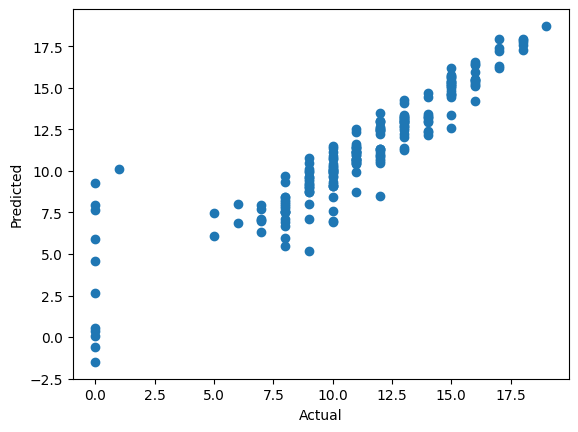

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Define hyperparameter ranges for each model
param_grid = {
    "Linear Regression": {},
    "Lasso": {"alpha": [1]},
    "K-Neighbors Regressor": {"n_neighbors": [3, 5, 7]},
    "Decision Tree": {"max_depth": [3, 5, 7], 'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']},
    "Random Forest Regressor": {'n_estimators': [8, 16, 32, 64, 128, 256], "max_depth": [3, 5, 7]},
    "Gradient Boosting": {'learning_rate': [0.1, 0.01, 0.05, 0.001], 'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
                          'n_estimators': [8, 16, 32, 64, 128, 256]},
    "XGBRegressor": {'depth': [6, 8, 10], 'learning_rate': [0.01, 0.05, 0.1], 'iterations': [30, 50, 100]},
    "CatBoost Regressor": {"iterations": [100, 500], "depth": [3, 5, 7]},
    "AdaBoost Regressor": {'learning_rate': [0.1, 0.01, 0.5, 0.001], 'n_estimators': [8, 16, 32, 64, 128, 256]}
}

model_list = []
r2_list = []

for model_name, model in models.items():
    # Create a scorer object to use in grid search
    scorer = make_scorer(r2_score)

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(
        model,
        param_grid[model_name],
        scoring=scorer,
        cv=5,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)  # Make predictions
    y_train_pred = grid_search.predict(X_train)
    y_test_pred = grid_search.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Best hyperparameters:', grid_search.best_params_)

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)
    print('=' * 35)
    print('\n')

# Display the results in a DataFrame
results_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)
print(results_df)

# Scatter plot of actual vs. predicted values for the best-performing model
best_model_name = results_df.iloc[0]['Model Name']
best_model = models[best_model_name]

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### Algorithm Visualization

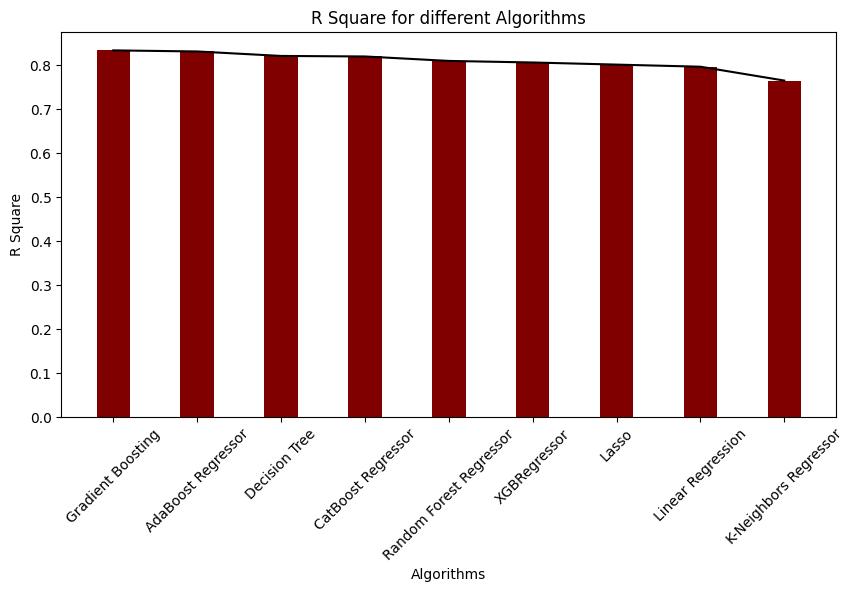

In [12]:
fig = plt.figure(figsize=(10, 5))

# Extract model names and R2 scores for plotting
models_bar = results_df['Model Name']
R2_Score_bar = results_df['R2_Score']

# Creating the bar plot
plt.bar(models_bar, R2_Score_bar, color='maroon', width=0.4)
plt.plot(models_bar, R2_Score_bar, color='black')

plt.xlabel("Algorithms")
plt.ylabel("R Square")
plt.title("R Square for different Algorithms")
plt.xticks(models_bar, rotation=45)
plt.show()

In [13]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
5,Gradient Boosting,0.833921
8,AdaBoost Regressor,0.831434
3,Decision Tree,0.821285
7,CatBoost Regressor,0.820066
4,Random Forest Regressor,0.809944
6,XGBRegressor,0.806389
1,Lasso,0.801565
0,Linear Regression,0.796785
2,K-Neighbors Regressor,0.765262


<Axes: xlabel='G3'>

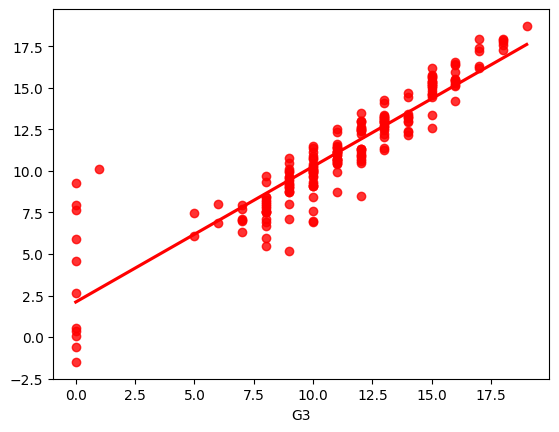

In [14]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [15]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
971,11,10.485528,0.514472
280,8,7.530701,0.469299
536,13,14.269149,-1.269149
824,11,11.203237,-0.203237
644,12,12.517244,-0.517244
...,...,...,...
689,13,11.375148,1.624852
848,8,6.687262,1.312738
617,13,13.042467,-0.042467
458,13,12.873281,0.126719


In [18]:
X.columns

Index(['age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [61]:
with open('model.pkl', 'wb') as files:
    pickle.dump(model, files)

### <center> **Model Prediction with User Input**

In [45]:
import pandas as pd
from pickle import load
from sklearn.preprocessing import LabelEncoder

# Load encoder, scaler, and model
encoder = load(open('label_encoder.pkl', 'rb'))
model = load(open('model.pkl', 'rb'))

# Extracting the relevant features from the DataFrame
features = ['Age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Walc', 'health', 'absences']

# Creating an empty dictionary to store user input
user_input = {}

# Take input from the user for each feature
for feature in features:
    if feature in ['Mjob', 'Fjob']:
        user_input[feature] = input("Enter {}: ".format(feature))
    else:
        user_input[feature] = float(input("Enter {}: ".format(feature)))  # Convert input to float for numerical features

# Creating a DataFrame with the user input
user_df = pd.DataFrame([user_input])

# Calculating 'avg_grade' based on 'G1', 'G2', and 'G3'
user_df['avg_grade'] = user_df[['G1', 'G2', 'G3']].mean(axis=1)

# Display the user input DataFrame
print("\nUser Input:")
print(user_df)

# Label encoding for categorical columns
categorical_columns = ['Mjob', 'Fjob']

label_encoder = LabelEncoder()
for column in categorical_columns:
    user_df[column] = label_encoder.fit_transform(user_df[column])

# Display the preprocessed user input DataFrame
print("\nPreprocessed User Input:")
print(user_df)


User Input:
    Age  Medu  Fedu     Mjob   Fjob  traveltime  studytime  famrel  freetime  \
0  20.0   3.0   1.0  teacher  other         2.0        1.0     5.0       4.0   

   goout  Walc  health  absences    G1    G2    G3  avg_grade  
0    3.0   2.0     2.0       4.0  11.0  12.0  13.0       12.0  

Preprocessed User Input:
    Age  Medu  Fedu  Mjob  Fjob  traveltime  studytime  famrel  freetime  \
0  20.0   3.0   1.0     0     0         2.0        1.0     5.0       4.0   

   goout  Walc  health  absences    G1    G2    G3  avg_grade  
0    3.0   2.0     2.0       4.0  11.0  12.0  13.0       12.0  
